**<h2>CUSTOMER SEGMENTATION (AMAZON REVIEWS)</h2>**

----
----

The data repository can be found [here](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html )

<br>
A pair of product categories have been chosen for this project.

*   Home and Kitchen
*   Grocery and Gourmet Food

The datasets considered for this project are the **5-core** dataset and the **metadata** of each category.

The datasets have already been processed, combined and saved.

<br>

**<h4>Business Objectives :</h4>**
*   Customer segmentation through the feedback analysis of the reviews to identify
  - Loyal customers and customers who will churn
  - Satisfied and dissatisfied customers

<br>

**<h4> Project Approach :</h4>**
*   Use features such as reviewerID and reviewTime to group data and aggregate neceaasry features
*   Use KMeans clustering algorithm for customer segmentation in both categories

----

# Libraries :

In [ ]:
# Libraries to handle datetime data
import datetime as dt                                   # To manipulate dates

# Libraries for data manipulation and visualization
import ast                                              # Abstract Syntax Trees (ast) package
import numpy as np                                      # To manipulate arrays
import pandas as pd                                     # To manipulate dataframes
from scipy import sparse                                # To manipulate sparse matrices

import matplotlib.pyplot as plt                         # To create charts and graphs
from matplotlib.patches import ConnectionPatch          # For graphs
import seaborn as sns                                   # To visualize
from wordcloud import WordCloud,STOPWORDS               # To create world cloud graphs

# Libraries to process text data
import re                                               # To apply regular expressions over string data
import string

# Libraries for statistical testing
import scipy.stats as sts                               # For chi square tests

# Libraries for transforming data
from sklearn.preprocessing import StandardScaler,MinMaxScaler         # To scale the numeric data

# Libraries for building models
from sklearn.cluster import KMeans                                    # For clustering

# Libraries to handel warnings
import warnings
warnings.filterwarnings('ignore')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# Reading saved data :

In [ ]:
# Function to read a string as a literal
def read_string_literal(strg) :
  try :
    return ast.literal_eval(strg)
  except :
    return pd.NaT

# Function to convert column to datetime object
def date_time_column(col,format_date='%Y-%m-%d') :
  return pd.to_datetime(col,format=format_date)

#### Reviews data :

In [ ]:
# Reading reviews in chunks : CSV
dict1={}
convert_cols={'reviewTime':date_time_column,'pos_words':read_string_literal,'neg_words':read_string_literal,'categories':read_string_literal}
i=0
with pd.read_csv('/content/drive/MyDrive/capstone_project_data.csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

data=pd.concat(dict1,axis=0)
data=data.droplevel(level=0)

display(pd.concat([data.head(3),data.tail(3)],axis=0))

,reviewerID,asin,reviewerName,reviewText,overall,reviewTime,Positive_feedback,Total_feedback,helpfulness_ratio,price,...,neg_words,no_pos,no_neg,total_words,polarity,sentiment,weekday,brand,categories,set
0,APYOBQE6M18AA,0615391206,Martin Schwartz,My daughter wanted this book and the price on ...,5.0,2013-10-19,0,0,0.000000,17.29,...,[],3.0,0.0,14.0,0.21,Positive,Saturday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,I bought this zoku quick pop for my daughterr ...,5.0,2014-06-18,0,0,0.000000,17.29,...,[],2.0,0.0,9.0,0.22,Positive,Wednesday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,There is no shortage of pop recipes available ...,4.0,2013-05-05,26,27,0.962963,17.29,...,"[shortage, scream, freeze, limited, gimmicky, ...",21.0,8.0,200.0,0.07,Neutral,Sunday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
702932,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","While I usually review CDs and DVDs, as well a...",5.0,2014-07-01,1,1,1.000000,13.00,...,"[allergic, intolerance, concerned]",12.0,3.0,158.0,0.06,Neutral,Tuesday,Enjoy,[Grocery & Gourmet Food],ggf
702933,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,My son and I enjoyed these oatmeal packets. H...,4.0,2014-07-04,0,1,0.000000,13.00,...,[junk],10.0,1.0,48.0,0.19,Positive,Friday,Enjoy,[Grocery & Gourmet Food],ggf
702934,A2CF66KIQ3RKX3,B00KCJRVO2,Vivian Deliz,I like to eat oatmeal i the mornings. I usuall...,4.0,2014-07-11,0,0,0.000000,13.00,...,"[suspect, cheap]",5.0,2.0,42.0,0.07,Neutral,Friday,Enjoy,[Grocery & Gourmet Food],ggf


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702935 entries, 0 to 702934
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   reviewerID         702935 non-null  object        
 1   asin               702935 non-null  object        
 2   reviewerName       696448 non-null  object        
 3   reviewText         702935 non-null  object        
 4   overall            702935 non-null  float64       
 5   reviewTime         702935 non-null  datetime64[ns]
 6   Positive_feedback  702935 non-null  int64         
 7   Total_feedback     702935 non-null  int64         
 8   helpfulness_ratio  702935 non-null  float64       
 9   price              632353 non-null  float64       
 10  language           702935 non-null  object        
 11  cleanText          702840 non-null  object        
 12  pos_words          702840 non-null  object        
 13  neg_words          702840 non-null  object  

In [ ]:
data.isnull().sum()

reviewerID               0
asin                     0
reviewerName          6487
reviewText               0
overall                  0
reviewTime               0
Positive_feedback        0
Total_feedback           0
helpfulness_ratio        0
price                70582
language                 0
cleanText               95
pos_words               95
neg_words               95
no_pos                  95
no_neg                  95
total_words             95
polarity                95
sentiment                0
weekday                  0
brand                    0
categories               0
set                      0
dtype: int64

#### Metadata data :

In [ ]:
# Reading meta in chunks : CSV
dict1={}
convert_cols={'categories':ast.literal_eval}
i=0
with pd.read_csv('/content/drive/MyDrive/capstone_project_meta_data.csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

meta_data=pd.concat(dict1,axis=0)
meta_data=meta_data.droplevel(level=0)

display(pd.concat([meta_data.head(3),meta_data.tail(3)],axis=0))

,asin,categories,title,description,price,brand,extracted_brand
0,0076144011,[Home & Kitchen],"Ninjas, Piranhas, and Galileo",NaN,NaN,Galileo,Galileo
1,0130350591,"[Home & Kitchen, Kitchen & Dining, Dining & En...",Le Creuset Kiwi (Green) Butter Dish Stoneware,Each piece of Le Creuset dinnerware is crafted...,NaN,Le Creuset,Le Creuset
2,0307394530,"[Home & Kitchen, Artwork, Posters & Prints]",Martha Stewart's Wedding Cakes,Of all the decisions that go into planning a w...,14.99,Random House,Martha Stewart
608745,B00LOXAZ1Q,[Grocery & Gourmet Food],"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",Sour Punch candy is the brand of mouth waterin...,16.55,Sour Punch,Sour Punch
608746,B00LOZ7F0S,[Grocery & Gourmet Food],Organic Mexican Vanilla,"Our Vanilla Extract made from\nPremium, Organi...",NaN,Premium,Premium
608747,B00LQWKDBM,[Grocery & Gourmet Food],Mrs. Grass Onion Soup and Dip Mix,NaN,NaN,Unknown,Unknown


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608748 entries, 0 to 608747
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   asin             608748 non-null  object 
 1   categories       608748 non-null  object 
 2   title            606850 non-null  object 
 3   description      549310 non-null  object 
 4   price            398320 non-null  float64
 5   brand            608745 non-null  object 
 6   extracted_brand  608745 non-null  object 
dtypes: float64(1), object(6)
memory usage: 37.2+ MB


In [ ]:
meta_data.isnull().sum()

asin                    0
categories              0
title                1898
description         59438
price              210428
brand                   3
extracted_brand         3
dtype: int64

# Functions used in creating clusters :

In [ ]:
# Function to extract frequent rating, review count and number of years active after grouping the data passed by reviewTime
def get_reviewer_info(groups) :
  dict1={}                                                                        # dictionary to hold list of info per customer/group

  for c,g in groups :
    z=g.groupby('reviewTime')['asin'].count()                                     # grouping a customer's orders by dates
    days=len(z)                                                                   # times a customer placed an order
    yrs=list(set(z.index.year))                                                   # years when orders were placed
    ratg_mode=g['overall'].mode()[0]                                              # most frequent rating

    dict1[c]=[ratg_mode,days,yrs]

  cust_freq=pd.DataFrame.from_dict(dict1,orient='index',
                                   columns=['rating','reviews_count','years_active'])      # converting dictionary to a dataframe
  cust_freq['no_years']=cust_freq['years_active'].apply(lambda x : len(x))                 # creating another column

  return cust_freq

# Function to aggregate product count, sentiment score, and average price of products reviewed
def clustered_data(grouped_reviewers) :
  # Aggregating other information, per customer/group
  clusters=grouped_reviewers.aggregate({'asin':'count','polarity':'mean','price':'mean'})                                   # aggregating different columns by different metrics
  clusters[['polarity','price']]=round(clusters[['polarity','price']],2)                                     # rounding float values to 2 decimal places

  return clusters

# Function to draw a circle
def draw_circle(radius,color,edge_color) :
  centre_circle = plt.Circle((0, 0),radius, fc=color,edgecolor=edge_color)
  fig = plt.gcf()
  return fig.gca().add_artist(centre_circle)


In [ ]:
# Function to find optimal number of clusters
def optimal_clusters(features) :
  # Finding the optimal number of clusters
  wcss=[]                      # list for within clusters sum of square
  ss=[]                        # list for silhouette scores
  list_k=list(range(2,15))     # list of the no. of clusters

  for k in list_k :
    # build model
    model=KMeans(n_clusters=k,max_iter=50).fit(features)     # fitting the cluster_data for different number of clusters

    # WCSS
    wcss.append(model.inertia_)                              # gives the sum of square of errors within a cluster

    # Silhouette score
    ss.append(silhouette_score(features,model.labels_))      # silhouette score for different clusters

  # Plot the graph to find the optimal number of clusters
  fig=plt.figure(figsize=(9,4))
  plt.subplot(121)                                # Within Clusters Sum of Squares errors (WCSS)
  plt.plot(list_k,wcss,color='blue')
  plt.title('Elbow plot',fontsize=9)
  plt.xlabel('Clusters')
  plt.ylabel('WCSS')

  plt.subplot(122)
  plt.plot(list_k,ss,color='red')                 # Silhouette score
  plt.title('Silhouette Score',fontsize=9)
  plt.xlabel('Clusters')
  plt.ylabel('Silhouette scores')
  plt.suptitle('Optimal clusters for +ve reviewers in H&K',fontweight='bold')
  plt.show()

# Function to display the clusters in a pie chart
def clusters_pie(data,title,colors) :
  # Pie chart of customer clusters
  z=data['cluster'].value_counts()

  fig=plt.figure(figsize=(5,5))
  wedges,txt,autotxt=plt.pie(z,autopct='%1.1f%%',labels=['Cluster '+str(x) for x in z.index],
                             pctdistance=0.85,labeldistance=1.1,colors=colors,
                             wedgeprops={'edgecolor':'white','linewidth':2},
                             textprops={'fontweight':'bold','fontsize':9})
  draw_circle(radius=0.7,color='white',edge_color='white')
  plt.title(title,fontweight='bold',fontsize=12)
  plt.show()

# Function to plot boxplots of features per cluster
def cluster_boxplot(data,title,suffix,x_label,figsize,padding=1.5) :
  # Box plot for each cluster
  groups=data.groupby('cluster')
  dict1={}
  columns=data.columns[1:-1]

  R,C,P=len(columns),1,1
  plt.subplots(R,C,figsize=figsize,gridspec_kw={'height_ratios':[2.5]*len(columns)})
  plt.subplots_adjust(hspace=padding)
  for col in columns :
    for c,g in groups :
      dict1['Cluster %d' %c]=g[col]

    clustered_col=pd.concat(dict1,axis=1)

    plt.subplot(R,C,P)
    sns.boxplot(clustered_col,orient='h',notch=True,medianprops={'linestyle':'-','color':'white'},flierprops={'marker':'.'},
                showmeans=True,meanline=True,meanprops={'linestyle':'--','color':'black'})
    if col=='polarity' :
      plt.axvline(x = 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.xticks(fontsize=8)
    plt.yticks(fontweight='bold',fontsize=8)
    plt.xlabel(x_label[P-1])
    plt.title(titles[P-1]+' '+suffix,fontweight='bold',fontsize=10)
    P+=1
  plt.show()

# Home & Kitchen :

In [ ]:
# Filtering data by category home and kitchen and grouping by reviewerIDs
hk_groups=data[data['set'].eq('hk')].groupby('reviewerID')

# Passing grouped data to extract customer's order frequency and years with amazon
hk_freq=get_reviewer_info(hk_groups)

display(hk_freq.head())

,rating,reviews_count,years_active,no_years
A0002382258OFJJ2UYNTR,5.0,2,[2013],1
A0010876CNE3ILIM9HV0,5.0,4,"[2013, 2014]",2
A00473363TJ8YSZ3YAGG9,4.0,6,"[2013, 2014]",2
A00593903MCE5GXTAGGNL,5.0,2,[2014],1
A0145698H8AAYMRXLBD8,5.0,2,[2013],1


In [ ]:
# Extracting more customer ingo from data grouped by reviewerID
hk_clusters=clustered_data(grouped_reviewers=hk_groups)

hk_clusters[['reviews_count','no_years_active']]=hk_freq[['reviews_count','no_years']]        # assigning 3 columns to the dataframe

display(hk_clusters)

,asin,polarity,price,reviews_count,no_years_active
reviewerID,,,,,
A0002382258OFJJ2UYNTR,5,0.24,13.04,2,1
A0010876CNE3ILIM9HV0,7,0.02,13.40,4,2
A00473363TJ8YSZ3YAGG9,12,0.10,18.96,6,2
A00593903MCE5GXTAGGNL,14,0.19,12.31,2,1
A0145698H8AAYMRXLBD8,5,0.19,32.56,2,1
...,...,...,...,...,...
AZZRRYBQG57LF,24,0.17,12.77,6,3
AZZTC2OYVNE2Q,6,0.09,30.56,2,2
AZZV9PDNMCOZW,14,0.08,43.31,11,6


In [ ]:
# Null values in the data
print('Null values in the data :\n',hk_clusters.isnull().sum(),'\n')

Null values in the data :
 asin               0
polarity           6
price              5
reviews_count      0
no_years_active    0
dtype: int64 



In [ ]:
# Droping null values
hk_clusters.dropna(inplace=True)
hk_clusters.reset_index(inplace=True)                     # resetting the index

display(hk_clusters.describe())

,asin,polarity,price,reviews_count,no_years_active
count,66508.000000,66508.000000,66508.000000,66508.00000,66508.000000
mean,8.291980,0.122373,45.515753,5.51260,2.737941
std,6.812333,0.077110,34.915160,5.43144,1.422311
min,4.000000,-0.200000,1.690000,1.00000,1.000000
25%,5.000000,0.070000,22.260000,3.00000,2.000000
50%,6.000000,0.120000,35.090000,5.00000,2.000000
75%,9.000000,0.170000,57.282500,6.00000,3.000000
max,277.000000,0.930000,536.120000,226.00000,15.000000


In [ ]:
# Scaling the price and count of products
scaler=StandardScaler()

hk_features=scaler.fit_transform(hk_clusters.iloc[:,1:])
hk_features

array([[-0.48324188,  1.52545684, -0.93014029, -0.64672102, -1.22192285],
       [-0.1896545 , -1.32763628, -0.91982951, -0.27849177, -0.51883648],
       [ 0.54431395, -0.29014787, -0.76058516,  0.08973747, -0.51883648],
       ...,
       [ 0.83790133, -0.54951997, -0.06317514,  1.01031058,  2.29350904],
       [-0.33644819, -0.03077577,  3.28639788,  0.08973747,  0.1842499 ],
       [-0.1896545 , -0.29014787,  1.15578876,  0.08973747,  0.1842499 ]])

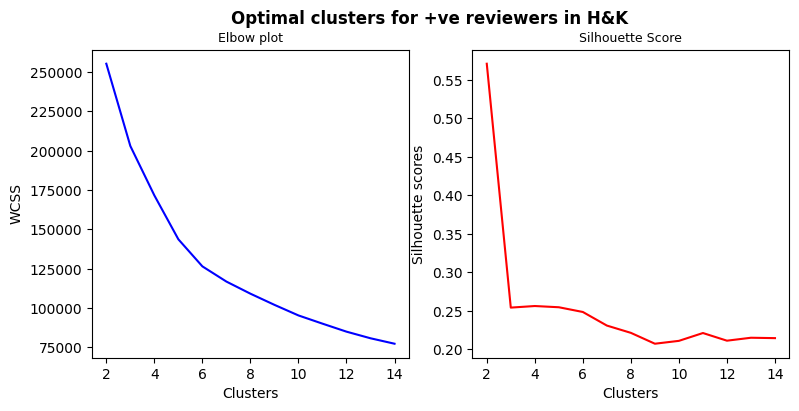

In [ ]:
# Optimal clusters
optimal_clusters(hk_features)

In [ ]:
# Based on the graphs, let the optimal number of clusters be 6
k=4

# Building clustering model
model=KMeans(n_clusters=k,max_iter=50,random_state=648)

# Clustering reviewerIDs
hk_clusters['cluster']=model.fit_predict(hk_features)

hk_clusters.head()

,reviewerID,asin,polarity,price,reviews_count,no_years_active,cluster
0,A0002382258OFJJ2UYNTR,5,0.24,13.04,2,1,1
1,A0010876CNE3ILIM9HV0,7,0.02,13.40,4,2,0
2,A00473363TJ8YSZ3YAGG9,12,0.10,18.96,6,2,1
3,A00593903MCE5GXTAGGNL,14,0.19,12.31,2,1,1
4,A0145698H8AAYMRXLBD8,5,0.19,32.56,2,1,1


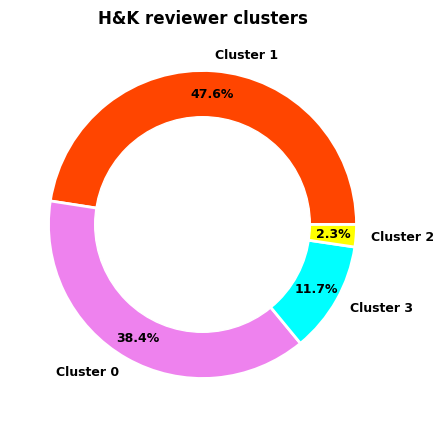

In [ ]:
# Pie chart of clusters in home and kitchen data
clusters_pie(hk_clusters,title='H&K reviewer clusters',
             colors=['orangered','violet','cyan','yellow','purple'])

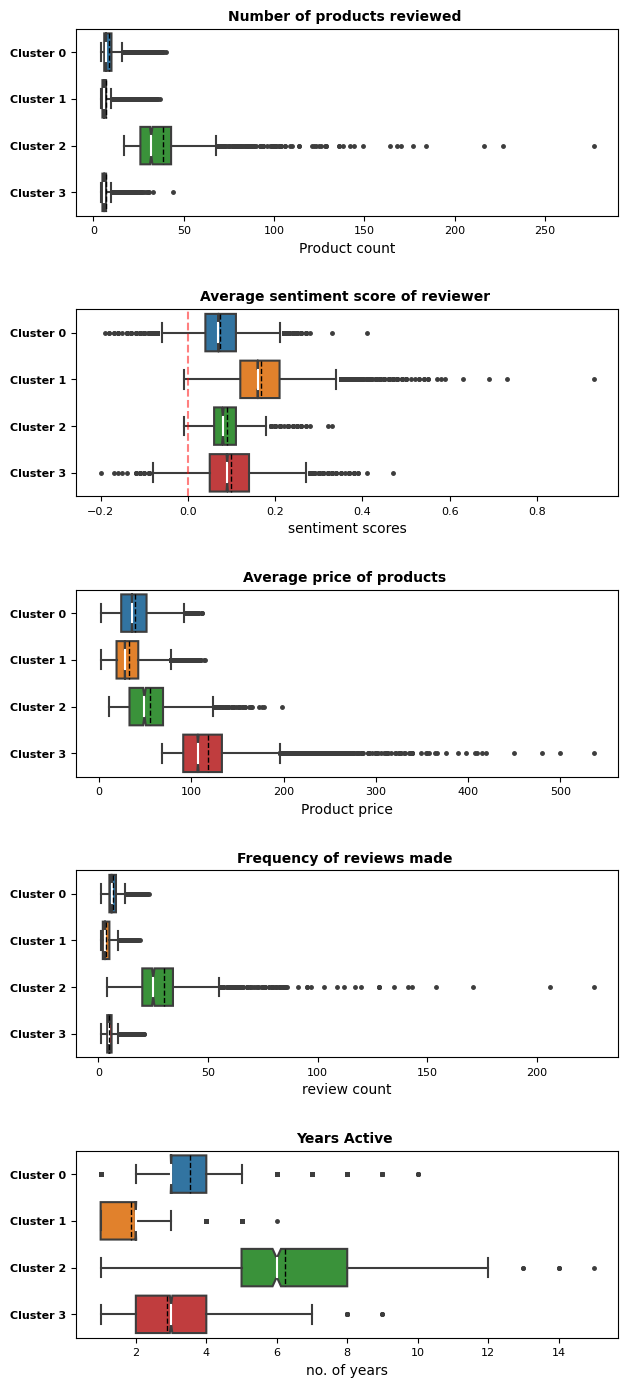

In [ ]:
# Box plot of every cluster per feature in the data
titles=['Number of products reviewed','Average sentiment score of reviewer','Average price of products',
        'Frequency of reviews made','Years Active']
x_labels=['Product count','sentiment scores','Product price','review count','no. of years']

cluster_boxplot(data=hk_clusters,title=titles,suffix='',x_label=x_labels,figsize=(7,17),padding=0.5)

In [ ]:
# Statistical description of each cluster
dict1={}

for c in np.sort(hk_clusters['cluster'].unique()) :
  dict1['Cluster %d' %c]=hk_clusters[hk_clusters['cluster']==c].iloc[:,1:-1].describe().T

hk_clusters_desc=pd.concat(dict1)
hk_clusters_desc

count        mean        std    min    25%  \
Cluster 0 asin             25549.0    8.783749   4.433291   4.00   6.00   
          polarity         25549.0    0.074570   0.052768  -0.19   0.04   
          price            25549.0   38.847890  18.490882   1.89  24.00   
          reviews_count    25549.0    6.577635   3.096330   1.00   5.00   
          no_years_active  25549.0    3.549376   1.210972   1.00   3.00   
Cluster 1 asin             31628.0    6.772164   2.686943   4.00   5.00   
          polarity         31628.0    0.168341   0.069857  -0.01   0.12   
          price            31628.0   32.507146  17.721992   1.69  18.93   
          reviews_count    31628.0    3.567472   1.763206   1.00   2.00   
          no_years_active  31628.0    1.875585   0.769461   1.00   1.00   
Cluster 2 asin              1556.0   38.784704  22.036609  17.00  26.00   
          polarity          1556.0    0.090508   0.046392  -0.01   0.06   
          price             1556.0   54.817789  28.932923  10.55  32.96   
          reviews_count     1556.0   29.994859  17.705594   4.00  20.00   
          no_years_active   1556.0    6.238432   2.139889   1.00   5.00   
Cluster 3 asin              7775.0    6.756013   2.696083   4.00   5.00   
          polarity          7775.0    0.098842   0.067597  -0.20   0.05   
          price             7775.0  118.482894  41.031487  68.65  91.20   
          reviews_count     7775.0    5.025852   2.488300   1.00   4.00   
          no_years_active   7775.0    2.878971   1.225066   1.00   2.00   

                               50%      75%     max  
Cluster 0 asin               7.000   10.000   40.00  
          polarity           0.070    0.110    0.41  
          price             35.620   51.450  111.33  
          reviews_count      6.000    8.000   23.00  
          no_years_active    3.000    4.000   10.00  
Cluster 1 asin               6.000    7.000   37.00  
          polarity           0.160    0.210    0.93  
          price             27.990   42.460  115.32  
          reviews_count      3.000    5.000   19.00  
          no_years_active    2.000    2.000    6.00  
Cluster 2 asin              32.000   43.000  277.00  
          polarity           0.080    0.110    0.33  
          price             49.185   69.305  198.76  
          reviews_count     25.000   34.000  226.00  
          no_years_active    6.000    8.000   15.00  
Cluster 3 asin               6.000    7.000   44.00  
          polarity           0.090    0.140    0.47  
          price            107.150  133.105  536.12  
          reviews_count      5.000    6.000   21.00  
          no_years_active    3.000    4.000    9.00

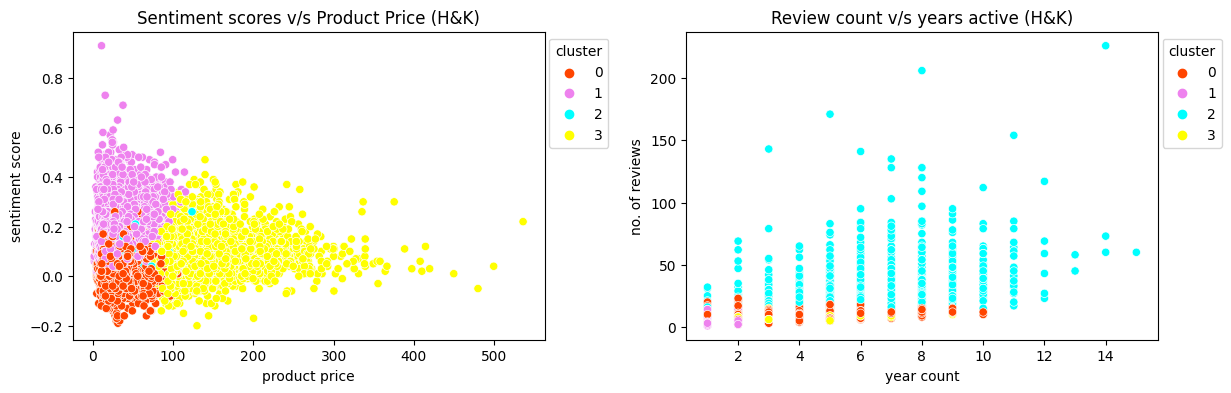

In [ ]:
# Scatter plots of clusters
fig,ax=plt.subplots(1,2,figsize=(14,4))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

plt.subplot(1,2,1)
sns.scatterplot(data=hk_clusters,x='price',y='polarity',hue='cluster',
                palette=['orangered','violet','cyan','yellow','purple'])
plt.xlabel('product price')
plt.ylabel('sentiment score')
plt.title('Sentiment scores v/s Product Price (H&K)')
plt.legend(bbox_to_anchor=(1.15,1),title='cluster')

plt.subplot(1,2,2)
sns.scatterplot(data=hk_clusters,x='no_years_active',y='reviews_count',hue='cluster',
                palette=['orangered','violet','cyan','yellow','purple'])
plt.xlabel('year count')
plt.ylabel('no. of reviews')
plt.title('Review count v/s years active (H&K)')
plt.legend(bbox_to_anchor=(1.15,1),title='cluster')
plt.show()

In [ ]:
# Selecting average of features in each cluster
s=hk_clusters_desc.loc[:,'mean']

# unstacking first level of the multiindexed series
cl_data=s.unstack(level=0)
cl_data

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
asin,8.783749,6.772164,38.784704,6.756013
polarity,0.074570,0.168341,0.090508,0.098842
price,38.847890,32.507146,54.817789,118.482894
reviews_count,6.577635,3.567472,29.994859,5.025852
no_years_active,3.549376,1.875585,6.238432,2.878971


In [ ]:
# Taking log of large features
log_list=['asin','price','reviews_count']

for i in log_list :
  cl_data.loc[i,:]=np.log(cl_data.loc[i,:].values)

cl_data

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
asin,2.172903,1.912821,3.658026,1.910433
polarity,0.074570,0.168341,0.090508,0.098842
price,3.659654,3.481460,4.004015,4.774769
reviews_count,1.883675,1.271857,3.401026,1.614595
no_years_active,3.549376,1.875585,6.238432,2.878971


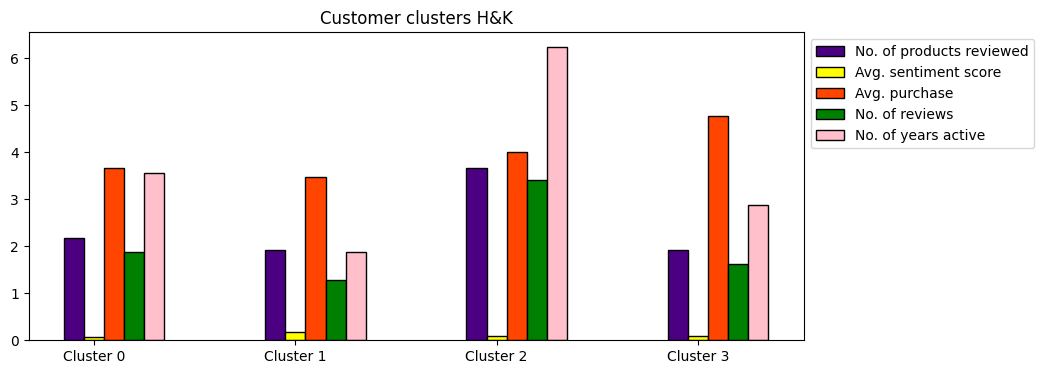

In [ ]:
# Defining variables for plotting graph
index=np.arange(len(cl_data.columns))
colors=['indigo','yellow','orangered','green','pink']
labels=['No. of products reviewed','Avg. sentiment score','Avg. purchase','No. of reviews','No. of years active']

# Plotting bar chart
fig,ax=plt.subplots(figsize=(10,4))
bar_width=.10
for i in range(len(cl_data)) :
  plt.bar(index+i*bar_width,cl_data.iloc[i,:],color=colors[i],label=labels[i],width=bar_width,edgecolor='black')

plt.title('Customer clusters H&K')
plt.xticks(index + bar_width, cl_data.columns)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Insights from clusters for H&K :**

---

-   47% reviewers are satisfied customers as they have
      high average sentiment scores. They also have average
      product purchase less than $150. They are in cluster 2.

-   38% reviewers are dissatisfied customers as they have
      near zero average sentiment scores. Their average product
      purchases are less than $100. They are in cluster 1.

-   12% reviewers are in cluster 4. They are the loyal customers,
      as they have been purchasing/reviewing products for multiple
      years and have mostly positive sentiment scores.

-   The remaining 2% reviewers are potential churners since their
      average sentiment scores are low but their average purchases
      are between $100 and $150. They are in cluster 3.


# Grocery and Gourmet Food :

In [ ]:
# Filtering data by grocery category and grouping by reviewerIDs
ggf_groups=data[data['set'].eq('ggf')].groupby('reviewerID')

# Extracting customer's order frequency and years with amazon
ggf_freq=get_reviewer_info(ggf_groups)

display(ggf_freq.head())

,rating,reviews_count,years_active,no_years
A00177463W0XWB16A9O05,5.0,4,[2013],1
A022899328A0QROR32DCT,5.0,8,"[2012, 2013, 2014]",3
A04309042SDSL8YX2HRR7,4.0,5,[2013],1
A068255029AHTHDXZURNU,5.0,2,[2014],1
A06944662TFWOKKV4GJKX,5.0,3,[2013],1


In [ ]:
# Extracting review count and active years for every reviewerID
ggf_clusters=clustered_data(grouped_reviewers=ggf_groups)

ggf_clusters[['reviews_count','no_years_active']]=ggf_freq[['reviews_count','no_years']]        # assigning 3 columns to the dataframe

display(ggf_clusters)

,asin,polarity,price,reviews_count,no_years_active
reviewerID,,,,,
A00177463W0XWB16A9O05,13,0.19,20.96,4,1
A022899328A0QROR32DCT,10,0.02,25.02,8,3
A04309042SDSL8YX2HRR7,5,0.08,15.07,5,1
A068255029AHTHDXZURNU,9,0.15,19.57,2,1
A06944662TFWOKKV4GJKX,9,0.07,22.68,3,1
...,...,...,...,...,...
AZWRZZAMX90VT,23,0.09,23.24,19,6
AZXKAH2DE6C8A,25,0.14,19.77,11,5
AZXON596A1VXC,7,0.15,32.09,4,2


In [ ]:
# Null values in the data
print('Null values in the data :\n',ggf_clusters.isnull().sum(),'\n')

Null values in the data :
 asin                0
polarity            1
price              10
reviews_count       0
no_years_active     0
dtype: int64 



In [ ]:
# Droping null values
ggf_clusters.dropna(inplace=True)
ggf_clusters.reset_index(inplace=True)                 # resetting the index

display(ggf_clusters.describe())

,asin,polarity,price,reviews_count,no_years_active
count,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,10.249983,0.137113,23.337251,7.465754,2.928799
std,10.579514,0.071376,9.301688,8.598406,1.542404
min,1.000000,-0.320000,2.940000,1.000000,1.000000
25%,5.000000,0.090000,18.840000,4.000000,2.000000
50%,7.000000,0.130000,22.770000,5.000000,3.000000
75%,11.000000,0.180000,27.020000,8.000000,4.000000
max,204.000000,0.650000,375.320000,152.000000,11.000000


In [ ]:
# Scaling the price and count of products
scaler=StandardScaler()

ggf_features=scaler.fit_transform(ggf_clusters.iloc[:,1:])
ggf_features

array([[ 0.25994673,  0.74098672, -0.25558064, -0.40308306, -1.25055743],
       [-0.02362977, -1.64085665,  0.18091406,  0.06213521,  0.04616402],
       [-0.49625727, -0.80020605, -0.88882049, -0.28677849, -1.25055743],
       ...,
       [-0.30720627,  0.18055299,  0.9410169 , -0.40308306, -0.60219671],
       [-0.40173177,  0.32066142,  0.24972111, -0.63569219, -0.60219671],
       [-0.49625727, -0.37988075, -0.10506523, -0.28677849,  0.04616402]])

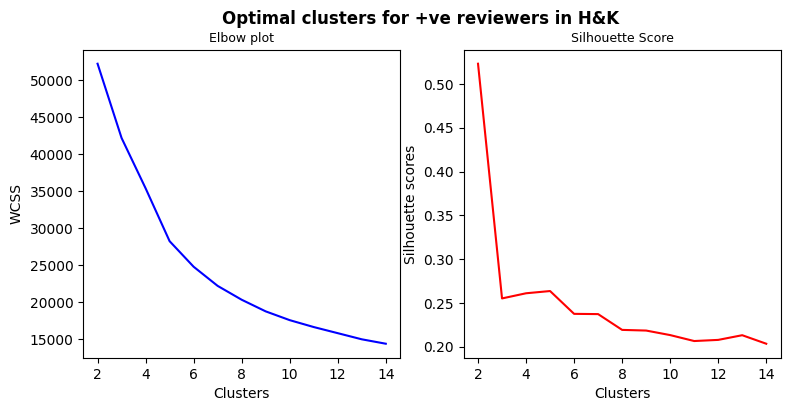

In [ ]:
# Finding the optimal number of clusters
optimal_clusters(ggf_features)

In [ ]:
# Based on the graphs, let the optimal number of clusters be 6
k=3

# Building clustering model
model=KMeans(n_clusters=k,max_iter=50,random_state=648)

# Clustering reviewerIDs
ggf_clusters['cluster']=model.fit_predict(ggf_features)

ggf_clusters.head()

,reviewerID,asin,polarity,price,reviews_count,no_years_active,cluster
0,A00177463W0XWB16A9O05,13,0.19,20.96,4,1,0
1,A022899328A0QROR32DCT,10,0.02,25.02,8,3,1
2,A04309042SDSL8YX2HRR7,5,0.08,15.07,5,1,0
3,A068255029AHTHDXZURNU,9,0.15,19.57,2,1,0
4,A06944662TFWOKKV4GJKX,9,0.07,22.68,3,1,1


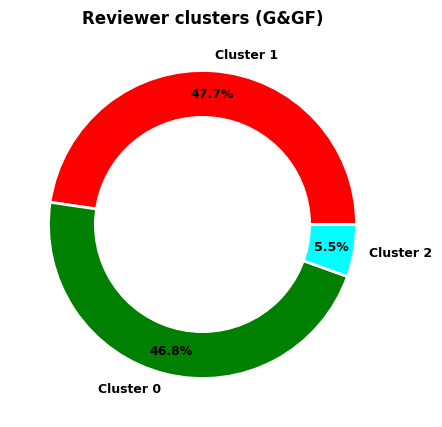

In [ ]:
# Pie chart of the clusters created
clusters_pie(ggf_clusters,title='Reviewer clusters (G&GF)',
             colors=['red','green','cyan'])

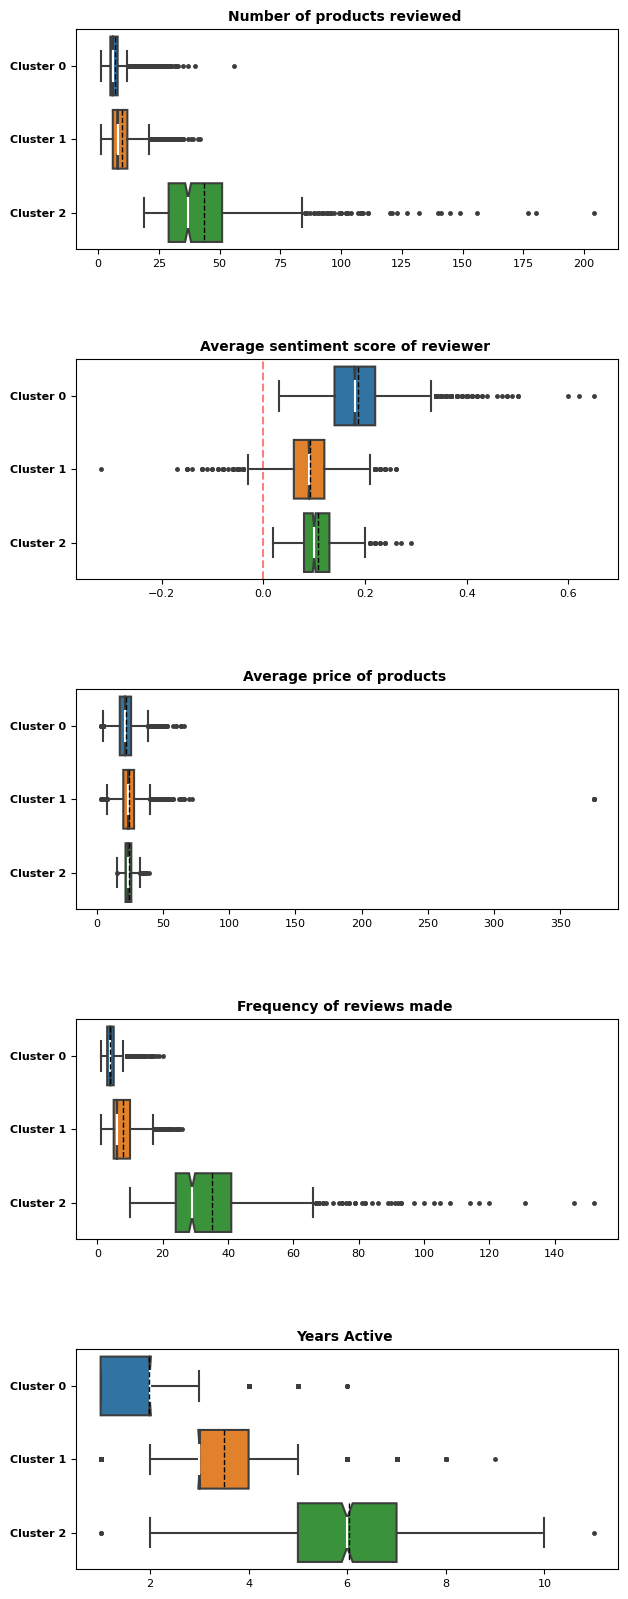

In [ ]:
# Boxplot of the clusters per feature
titles=['Number of products reviewed','Average sentiment score of reviewer','Average price of products',
        'Frequency of reviews made','Years Active']
xlabels=['','','','','']

cluster_boxplot(data=ggf_clusters,title=titles,suffix='',x_label=xlabels,figsize=(7,20),padding=0.5)

In [ ]:
# Statistical description of each cluster
dict1={}

for c in np.sort(ggf_clusters['cluster'].unique()) :
  dict1['Cluster %d' %c]=ggf_clusters[ggf_clusters['cluster']==c].iloc[:,1:-1].describe().T

ggf_clusters_desc=pd.concat(dict1)
ggf_clusters_desc

count       mean        std    min    25%     50%  \
Cluster 0 asin             6912.0   6.960503   3.248058   1.00   5.00   6.000   
          polarity         6912.0   0.186859   0.061594   0.03   0.14   0.180   
          price            6912.0  21.880871   6.662899   2.94  17.40  21.375   
          reviews_count    6912.0   3.987269   2.116451   1.00   3.00   4.000   
          no_years_active  6912.0   1.979890   0.854838   1.00   1.00   2.000   
Cluster 1 asin             7040.0   9.657102   5.283445   1.00   6.00   8.000   
          polarity         7040.0   0.091652   0.046612  -0.32   0.06   0.090   
          price            7040.0  24.691176  11.508715   2.94  20.05  23.840   
          reviews_count    7040.0   7.721449   4.266262   1.00   5.00   6.000   
          no_years_active  7040.0   3.503835   1.300218   1.00   3.00   3.000   
Cluster 2 asin              809.0  43.514215  22.531444  19.00  29.00  37.000   
          polarity          809.0   0.107701   0.040546   0.02   0.08   0.100   
          price             809.0  23.998393   3.519528  14.94  21.73  23.660   
          reviews_count     809.0  34.960445  17.108663  10.00  24.00  29.000   
          no_years_active   809.0   6.032138   1.501305   1.00   5.00   6.000   

                               75%     max  
Cluster 0 asin              8.0000   56.00  
          polarity          0.2200    0.65  
          price            25.9425   65.89  
          reviews_count     5.0000   20.00  
          no_years_active   2.0000    6.00  
Cluster 1 asin             12.0000   42.00  
          polarity          0.1200    0.26  
          price            28.1925  375.32  
          reviews_count    10.0000   26.00  
          no_years_active   4.0000    9.00  
Cluster 2 asin             51.0000  204.00  
          polarity          0.1300    0.29  
          price            26.1000   39.72  
          reviews_count    41.0000  152.00  
          no_years_active   7.0000   11.00

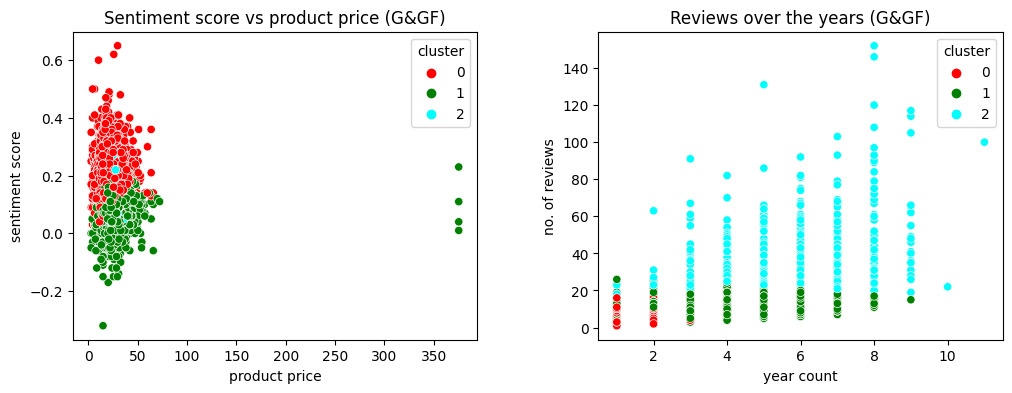

In [ ]:
# Plotting scatter plot for clusters
fig,ax=plt.subplots(1,2,figsize=(12,4))
fig.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.scatterplot(data=ggf_clusters,x='price',y='polarity',hue='cluster',palette=['red','green','cyan'])
plt.xlabel('product price')
plt.ylabel('sentiment score')
plt.title('Sentiment score vs product price (G&GF)')
plt.legend(bbox_to_anchor=(1,1),title='cluster')

plt.subplot(1,2,2)
sns.scatterplot(data=ggf_clusters,x='no_years_active',y='reviews_count',hue='cluster',palette=['red','green','cyan'])
plt.xlabel('year count')
plt.ylabel('no. of reviews')
plt.title('Reviews over the years (G&GF)')
plt.legend(bbox_to_anchor=(1,1),title='cluster')

plt.show()

In [ ]:
# Selecting average of festures in each cluster
s2=ggf_clusters_desc.loc[:,'mean']

# unstacking first level of the multiindexed series
cl_data2=s2.unstack(level=0)
cl_data2

,Cluster 0,Cluster 1,Cluster 2
asin,6.960503,9.657102,43.514215
polarity,0.186859,0.091652,0.107701
price,21.880871,24.691176,23.998393
reviews_count,3.987269,7.721449,34.960445
no_years_active,1.979890,3.503835,6.032138


In [ ]:
# Taking log of large features
log_list=['asin','price','reviews_count']

for i in log_list :
  cl_data2.loc[i,:]=np.log(cl_data2.loc[i,:].values)

cl_data2

,Cluster 0,Cluster 1,Cluster 2
asin,1.940252,2.267694,3.773088
polarity,0.186859,0.091652,0.107701
price,3.085613,3.206446,3.177987
reviews_count,1.383106,2.044002,3.554217
no_years_active,1.979890,3.503835,6.032138


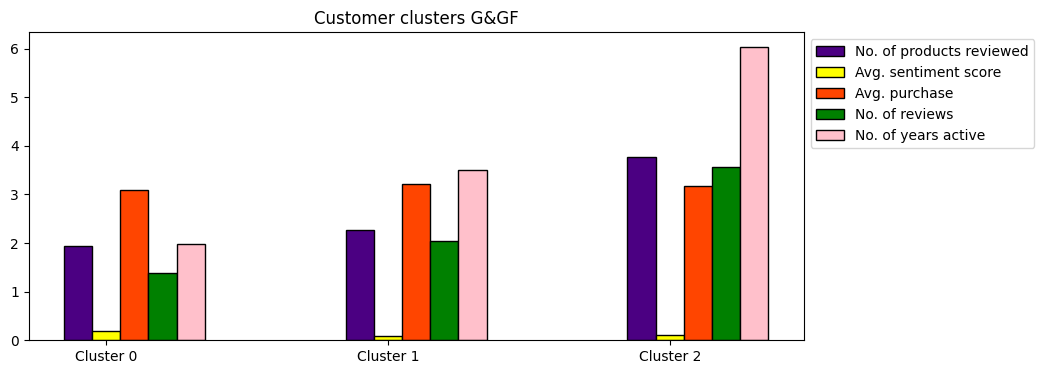

In [ ]:
# Defining variables for plotting graph
index=np.arange(len(cl_data2.columns))
colors=['indigo','yellow','orangered','green','pink']
labels=['No. of products reviewed','Avg. sentiment score','Avg. purchase','No. of reviews','No. of years active']

# Plotting bar chart
fig,ax=plt.subplots(figsize=(10,4))
bar_width=.10
for i in range(len(cl_data2)) :
  plt.bar(index+i*bar_width,cl_data2.iloc[i,:],color=colors[i],label=labels[i],width=bar_width,edgecolor='black')

plt.title('Customer clusters G&GF')
plt.xticks(index + bar_width, cl_data2.columns)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Insights from customer clusters of G&GF category :**

---

<big>

-   47% reviewers are satisfied customers as they have high average sentiment scores and less than $50 average product purchase. They are in cluster 1.

-   48% reviewers are dissatisfied customers as they have low average sentiment scores. Their average product purchases are also not  greater than $50. They are in cluster 2.

-   The remaining 5% reviewers are potential churners since their average sentiment scores are near zero and their average purchases are less than $20. They are in cluster 3.
